# INTRODUCTION
* I want to share with you a situation that draws my attention about exploratory data analysis(EDA).
* When I look at exploratory data analysis I observe that most of the plots or graphs are ordinary like bar plots, heat maps for correlation and maps.
* Although I like reading different kernels and exploring varied datasets, same visualization plots are boring for me and they do not improve me.
* On the other hand, in order to make better visualization, you need to improve and fill with more visualization technique your graphic repository. 
* Therefore, I make tutorial about rare visualization techniques. Some of the plots or graphs can be familiar for you but as much as I can, I will try to visualize different graphics.
* Python is open source and diffent libraries can be used. Lets look at which visualization libraries we will use.
<br>
<br>
* [Matrix and Box Plots (Missingno)](#1)
* [Parallel Plots (Pandas)](#2)
* [Network Charts (Networkx)](#3)
* [Venn (Matplotlib)](#4)
* [Donut (Matplotlib)](#5)
* [Spider Chart (Matplotlib)](#6) 
* [Cluster Map (Seaborn)](#7) 
* [Inset Plots (Plotly)](#8) 
* [Basic 3D Scatter Plot (Plotly)](#9) 
* Earthquare Animation (Plotly): https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly
<br>
<br>
* [Conclusion](#10) 

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
from math import pi
from pandas.tools.plotting import parallel_coordinates
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

ModuleNotFoundError: No module named 'pandas.tools'

<a id="1"></a> <br>
## Matrix and Bar Plots (Missingno)
* In data analysis, one of the first steps is cleaning messy datasets and missing values.
* In order to explore whether data has missign value or not, I always use .info() method from pandas library. It gives a lot of information.
* Visualization is always attractive for people. Therefore, if we can visualize missign values, it can be better understandable.
* In order to visualize missign data, we can use missigno package.
* Lets create pandas dataframe that includes missign values (NaN) and visualize it.
    * Dictionary: One of the methods of creating data frame is first creating dictionary then put it into pd.DataFrame
    * data_missingno: Data frame that we will use in this example
    * import missingno as msno: import missingno library and define as msno (shortcut)
    * matrix(): Create matrix. Number of rows is number of sample and number of columns is number of features(column1, column2, column3) in data_missingno.
    * show(): shows the plot
* The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.
* Missign values are white and non missign values are black in plot.
* It can be seen from plot column1 does not have missign value. Column2 has five missign values and column3 has three missign values.

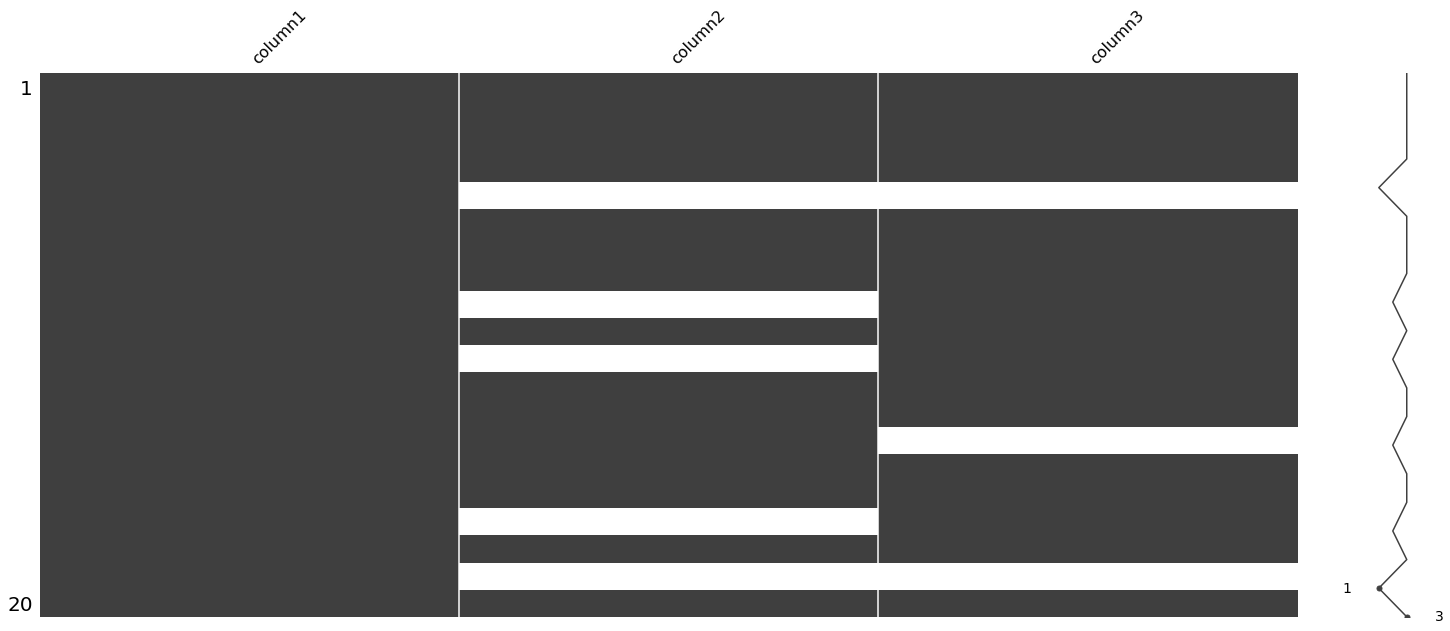

In [7]:
# Define dictionary
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
# Create data frame from dictionary
data_missingno = pd.DataFrame(dictionary) 

# import missingno library
import missingno as msno
msno.matrix(data_missingno)
plt.show()

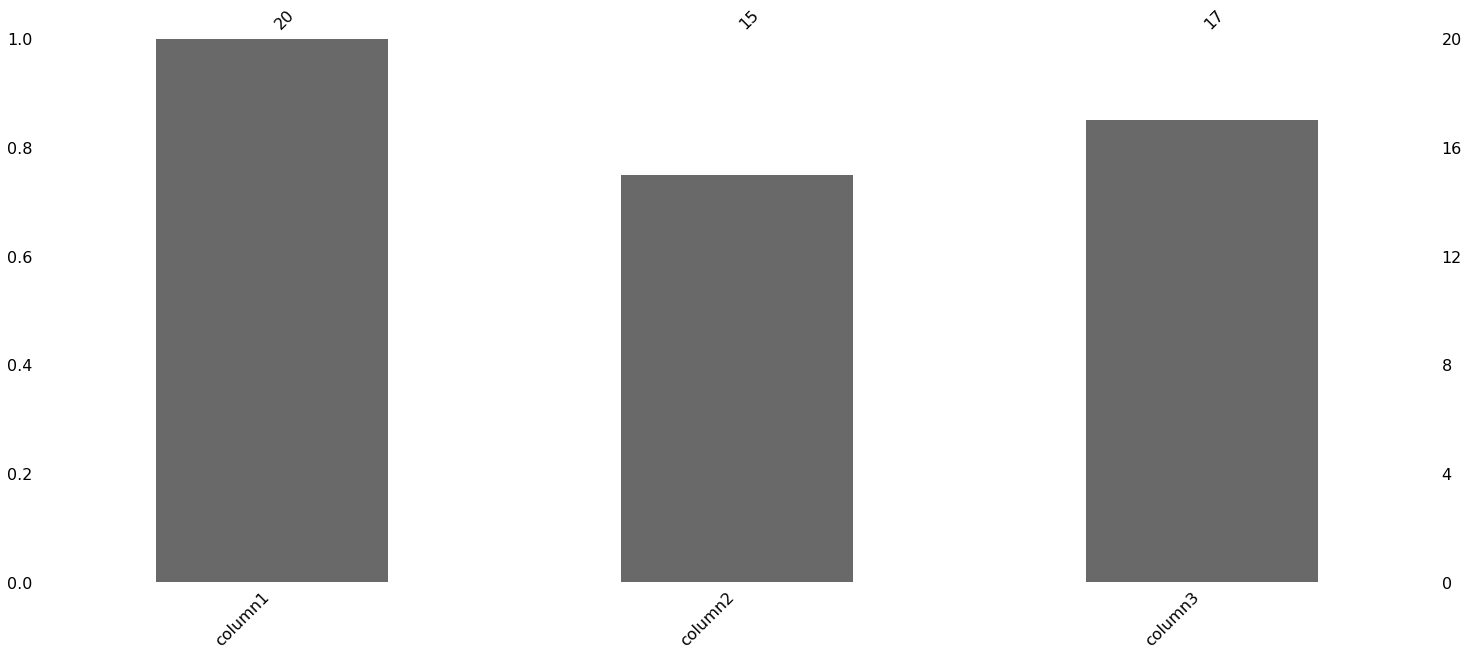

In [8]:
msno.bar(data_missingno)
plt.show()

<a id="2"></a> <br>
## Parallel Plots (Pandas)
* In order to learn parallel plots, we will use famous iris data set from sklearn library
* Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.
* Each vertical bar represents a feature(column or variable) like petal length (cm).
* Values are then plotted as series of lines connected across each axis.
* Different colors shows different classes like setosa.
* Parallel plot allow to detect interesting patterns. For example as you can see we can easily classify *setosa* according to *petal width (cm)* feature.
* Lets look at code.
    * Load iris data into data frame
    * parallel_coordinates: we import parallel_coordinates from pandas library
    * colormap: color map that paints classes with different colors

In [ ]:
# load iris data
data = pd.read_csv('../input/Iris.csv')
data = data.drop(['Id'],axis=1)
# Make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

<a id="3"></a> <br>
## Network Charts (Networkx)
* We will use iris data that we import at previous part( parallel plot)
* Network charts are related with correlation network.
* It can be used instead of heatmaps in seaborn library.
* At first look at correlation between features.
    * corr(): gives correlation between features
    * As you can see from table below, petal length is positively correlated with sepal length and petal width. Also, petal length is negatively correlated with sepal width.

In [9]:
# Calculate the correlation between individuals.
corr = data.iloc[:,0:4].corr()
corr

NameError: name 'data' is not defined

* We have 4 individuals(features), and know how close they are related to each other (above correlation table).
* It is possible to represent these relationships in a network
* Each individual called as a node. If 2 individuals(features like sepal length and sepal width) are close enough (threshold), then they are linked by a line.
    * threshold: threshold of the correlation. For example, if we say that threshold = 0.5, network will be established between the nodes that have higher correlation than 0.5
* I will put -1 that is default threshold value. min(cor(A,B))= -1 so all nodes are connected with each other.
* You can try threshold = 0.9, you will see that petal length and width are connected with each other.
* It is alternative to heatmap.
* As a final words of network charts, they can be used in data sets that are related with populations and their habits. Maybe,we can observe populations are clearly split in X groups according to their habits.
* Now lets look at our code with iris datasets.

In [10]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

# correlation
threshold = -1

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_dataframe(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)


NameError: name 'corr' is not defined

In [11]:
<a id="4"></a> <br>
## Venn (Matplotlib)
* You can use venn diagram to visualize the size of groups and their intersection.

SyntaxError: invalid syntax (<ipython-input-11-a748c83ca6e4>, line 1)